# **TS1-NOELIA FERRARI-CON CORRECCIONES**

### INTRODUCCIÓN TEÓRICA
___


El análisis y la síntesis de señales es una herramienta importante, que nos permite representar fenómenos periódicos y no periódicos en términos matemáticos y estudiarlos en el dominio del tiempo.

Una de las señales básicas es la **sinusoidal**, cuya expresión es:

$$
x(t) = A \cdot \sin(2 \pi f t + \varphi)
$$

donde:

$$
\begin{align*}
A & : \text{ amplitud de la señal (valor máximo que alcanza).} \\
f & : \text{ frecuencia en Hertz } (Hz), \text{ indica la cantidad de oscilaciones por segundo.} \\
t & : \text{ variable de tiempo.} \\
\varphi & : \text{ fase inicial, que determina el desplazamiento.}
\end{align*}
$$

La señal sinusoidal es el bloque elemental de la teoría de Fourier, ya que cualquier señal periódica puede descomponerse como combinación de sinusoidales.

<div align="center">

En este trabajo se estudiarán distintos conceptos a partir de una señal con frecuencia de 2 kHz.  
Se amplificará y desfazará la señal, desplazándola en el tiempo sin modificar su forma.  
La modulación en amplitud se obtiene al multiplicar una señal portadora de alta frecuencia por una señal moduladora de menor frecuencia, en este caso, igual a la mitad de la frecuencia de la portadora.  
También se estudiará la potencia de una señal. La potencia promedio \(P\) de una señal periódica \(x(t)\) se define como:

$$
P = \frac{1}{N} \sum_{n=0}^{N-1} x^2[n]
$$

</div>

Veremos conceptos como la **correlación** y **autocorrelación**.
La autocorrelación permite medir la similitud de una señal consigo misma en distintos retardos, mientras que correlación cruzada mide el grado de semejanza entre dos señales distintas.

Finalmente, calcularemos la **energía de una señal**. Para una señal discreta \(x[n]\) con \(N\) muestras, la **energía total** se define como:


$$
E = \sum_{n=0}^{N-1} |x[n]|^2
$$

y la **energía promedio** se calcula como: 

$$
E_\text{prom} = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2
$$

- La **energía total** representa la cantidad de “trabajo” que podría realizar la señal si se tratara de una señal eléctrica.  
- La **energía promedio** indica la energía por muestra y es útil si queremos comparar señales de distinta duración.  







### ANÁLISIS Y DESARROLLO
___


#### **Ejercicio 1**

##### Sintetizar y graficar:

##### **a) Una señal sinusoidal de 2KHz.**

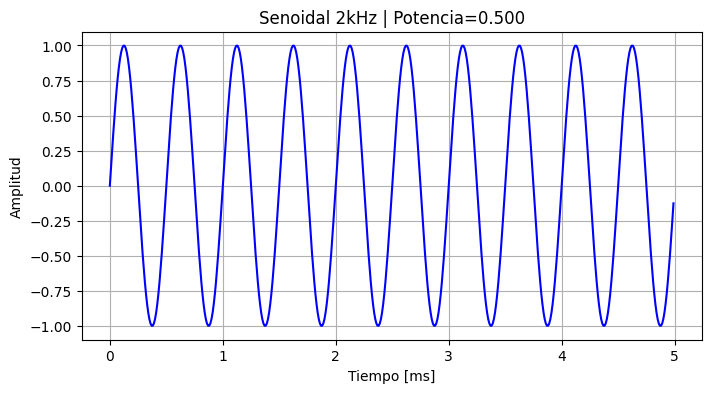

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Función generadora de senoidales ----
def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=50000):
    """
    vmax = amplitud máxima
    dc   = componente continua
    ff   = frecuencia de la señal (Hz)
    ph   = fase (rad)
    nn   = número de muestras
    fs   = frecuencia de muestreo
    """
    t = np.arange(0, nn) / fs #vector de tiempo de la señal, donde genera un arreglo con nn elementos. 
    ##Dividimos por fs (frecuencia de muestreo) para convertir esos indices de muestra en tiempo en segundos.
    x = dc + vmax * np.sin(2 * np.pi * ff * t + ph) #vector de amplitud de la señal senoidal generada.
    #Cada valor de x[i] corresponde a la amplitud de la señal en el instante t[i].
    return t, x

# Parámetros generales
N  = 500       # número de muestras
fs = 100000    # frecuencia de muestreo
f1 = 2000      # frecuencia base (2 kHz)
#Ts=1/fs tiempo entre muestras --> 1/100000=0.00001 s

# ---- 1) Senoidal 2 kHz ----
t, x1 = mi_funcion_sen(vmax=1, ff=f1, ph=0, nn=N, fs=fs)
P1 = np.mean(x1**2)

plt.figure(figsize=(8,4))
plt.plot(t*1000, x1, color='blue')
plt.title(f"Senoidal 2kHz | Potencia={P1:.3f}")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

P1 = np.mean(x1**2)


##### **b) Misma señal amplificada y desfazada en π/2.**

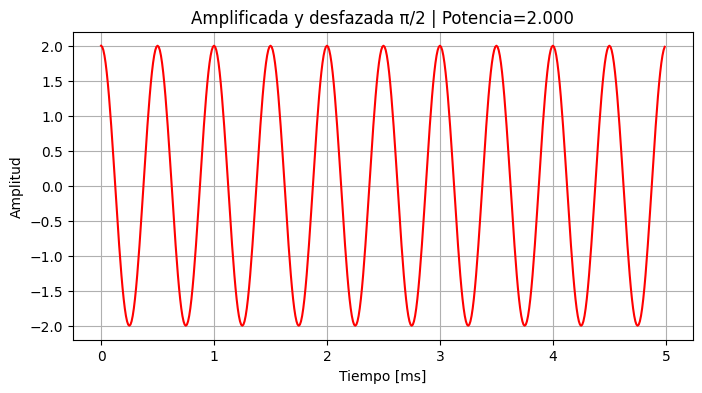

In [4]:
t, x2 = mi_funcion_sen(vmax=2, ff=f1, ph=np.pi/2, nn=N, fs=fs)
P2 = np.mean(x2**2)


plt.figure(figsize=(8,4))
plt.plot(t*1000, x2, color='red')
plt.title(f"Amplificada y desfazada π/2 | Potencia={P2:.3f}")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()




##### **c) Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.**

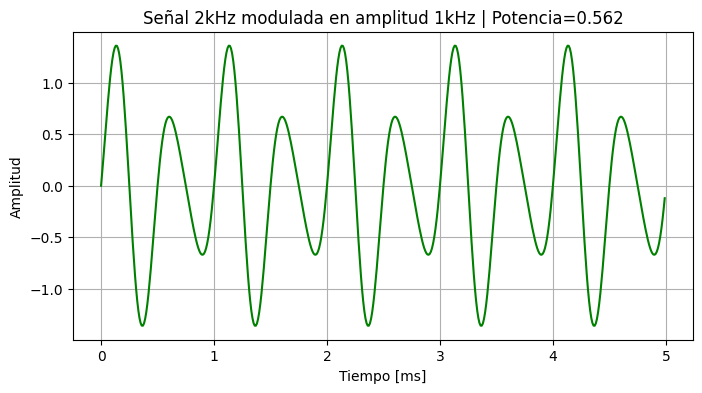

In [5]:
f2 = f1/2
m = 1 + 0.5 * np.sin(2 * np.pi * f2 * t)
x3 = m * x1 #acá modulamos en amplitud la señal original x1 multiplicándola por m
#Esto crea variaciones de amplitud a la frecuencia f2 (1 kHz).
P3 = np.mean(x3**2)

plt.figure(figsize=(8,4))
plt.plot(t*1000, x3, color='green')
plt.title(f"Señal 2kHz modulada en amplitud 1kHz | Potencia={P3:.3f}")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()



##### **d) Señal anterior recortada al 75% de su potencia.**

Normalizamos la amplitud de la señal, es decir, \(A = 1\).  

La potencia promedio de la señal es:  

$$
P = \frac{A^2}{2}
$$

Si queremos que la señal tenga el 75% de la potencia original, debemos **recortar la amplitud**, no la potencia directamente.  
El factor de escala de la amplitud se obtiene como:  

$$
A_{\text{nuevo}} = \sqrt{0.75} \cdot A
$$


<function matplotlib.pyplot.show(close=None, block=None)>

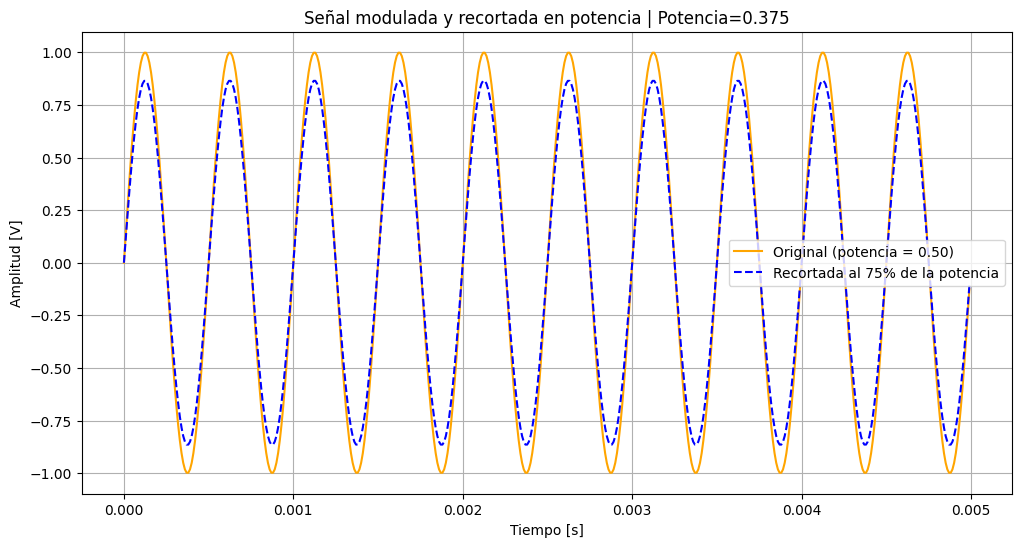

In [6]:
# Señal original (modulada)
potencia_original = np.mean(x1**2)
# Queremos que la nueva potencia sea el 75% de la original
potencia_deseada = 0.75 * potencia_original
# El factor de escala es la raíz cuadrada de (potencia_deseada / potencia_original)
factor = np.sqrt(potencia_deseada / potencia_original)
# Señal recortada en potencia
x1_recortada = x1 * factor
P4 = np.mean(x1_recortada**2)

# Graficar ambas señales para comparar
plt.figure(figsize=(12, 6))
plt.plot(t, x1, label="Original (potencia = {:.2f})".format(potencia_original), color='orange')
plt.plot(t, x1_recortada, label="Recortada al 75% de la potencia", linestyle='--',  color='blue')
plt.title(f"Señal modulada y recortada en potencia | Potencia={P4:.3f}")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.legend()
plt.grid(True)
plt.show




##### **e) Una señal cuadrada de 4KHz.**

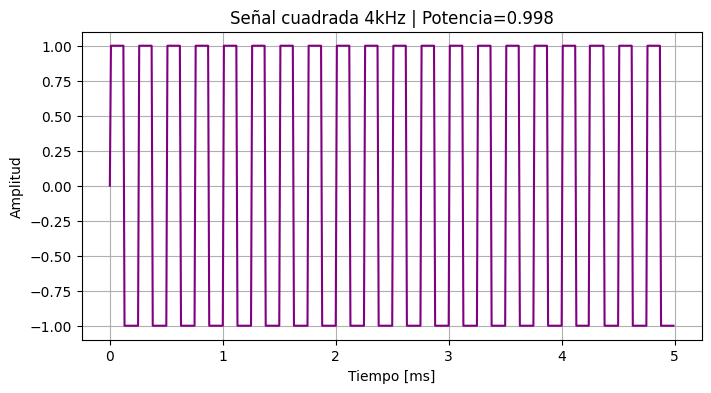

In [7]:
f3 = 4000 #4kHz
x5 = np.sign(np.sin(2*np.pi*f3*t)) #La forma cuadrada se obtiene aplicando np.sign() a una senoidal, que la “aplana” en +1 y -1.
#La función np.sign() devuelve:
#+1 si el valor es positivo
#0 si el valor es cero
#-1 si el valor es negativo
P5 = np.mean(x5**2)

plt.figure(figsize=(8,4))
plt.plot(t*1000, x5, color='purple')
plt.title(f"Señal cuadrada 4kHz | Potencia={P5:.3f}")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()




##### **f) Un pulso rectangular de 10ms.**

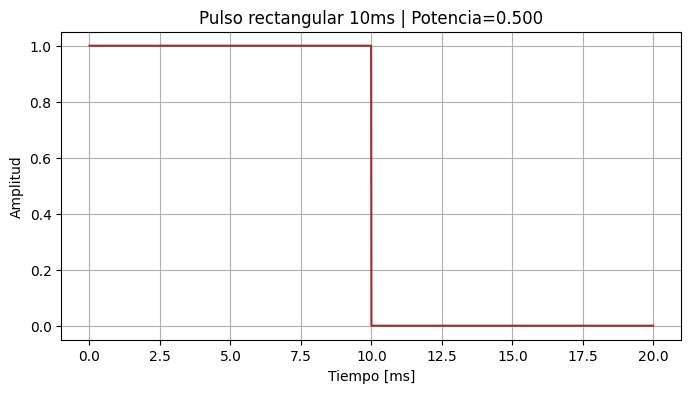

In [8]:
t2 = np.arange(0, 20e-3, 1/fs)
x6= np.zeros_like(t2)
x6[t2 < 10e-3] = 1          # pulso de 10 ms

P6 = np.mean(x6**2)         # potencia promedio

plt.figure(figsize=(8,4))
plt.plot(t2*1000, x6, color='brown')
plt.title(f"Pulso rectangular 10ms | Potencia={P6:.3f}")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()



#### **Ejercicio 2**

##### Verificar ortogonalidad entre la primera señal y las demás.

In [9]:
#Ajuste del pulso para la misma longitud que x1, dado que para calcular la ortogonalidad las señales deben tener la misma
#cantidad de muestras
x6_interp = np.interp(t, t2, x6) 


senales = [x2, x3, x1_recortada, x5, x6_interp]
nombres  = ['x2 (Amplificada π/2)', 'x3 (Modulada)', 'x4 (Recortada en potencia)', 'x5 (Cuadrada 4kHz)', 'x6 (Pulso 10ms)']

def es_ortogonal(x, y):
    return np.sum(x * y)

print("\nVerificación de ortogonalidad con x1:\n")
for i, s in enumerate(senales):
    producto_interno = es_ortogonal(x1, s)
    print(f"Producto interno de x1 y {nombres[i]}: {producto_interno:.6f}")
    if np.isclose(producto_interno, 0, atol=1e-6): #tolerancia absoluta de 1e-6,
        #para que pequeñas diferencias numericas por redondeo no afecten la comparacion.
        print(f"→ x1 y {nombres[i]} son ortogonales\n")
    else:
        print(f"→ x1 y {nombres[i]} NO son ortogonales\n")



Verificación de ortogonalidad con x1:

Producto interno de x1 y x2 (Amplificada π/2): -0.000000
→ x1 y x2 (Amplificada π/2) son ortogonales

Producto interno de x1 y x3 (Modulada): 250.000000
→ x1 y x3 (Modulada) NO son ortogonales

Producto interno de x1 y x4 (Recortada en potencia): 216.506351
→ x1 y x4 (Recortada en potencia) NO son ortogonales

Producto interno de x1 y x5 (Cuadrada 4kHz): 0.000000
→ x1 y x5 (Cuadrada 4kHz) son ortogonales

Producto interno de x1 y x6 (Pulso 10ms): -0.000000
→ x1 y x6 (Pulso 10ms) son ortogonales



#### **Ejercicio 3**

**CORRECIONES**


Primero calculo la autocorrelación de forma teórica de una senoidal: 

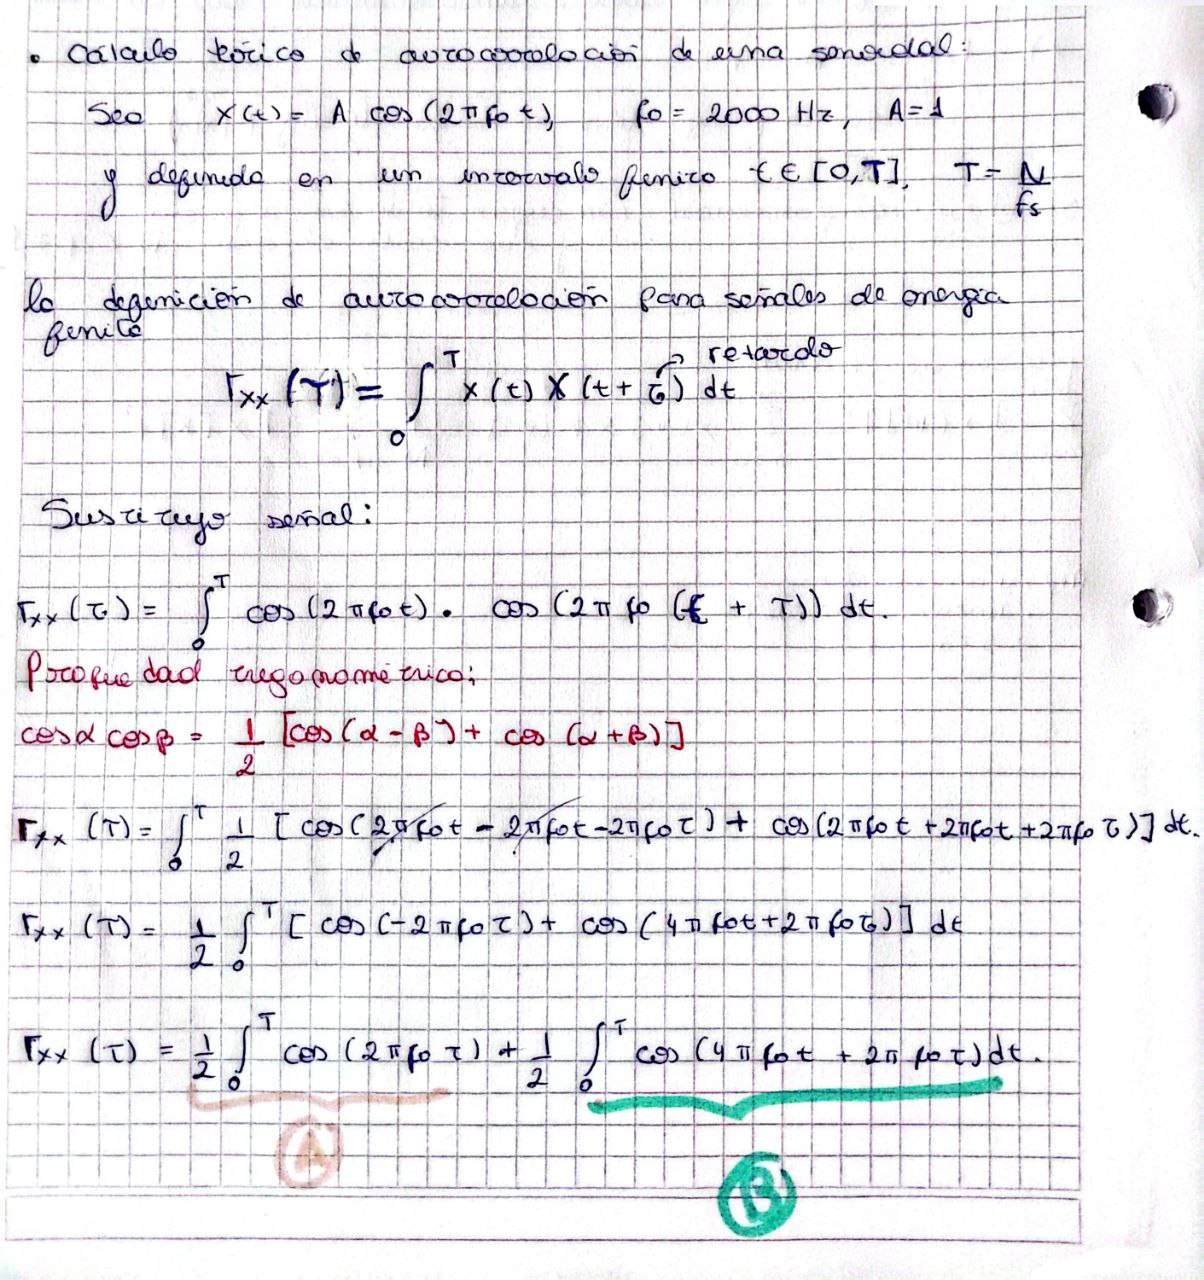

In [15]:
from IPython.display import Image, display
display(Image(filename='C:/Users/noefe/Downloads/imagen3_ts1.jpg'))

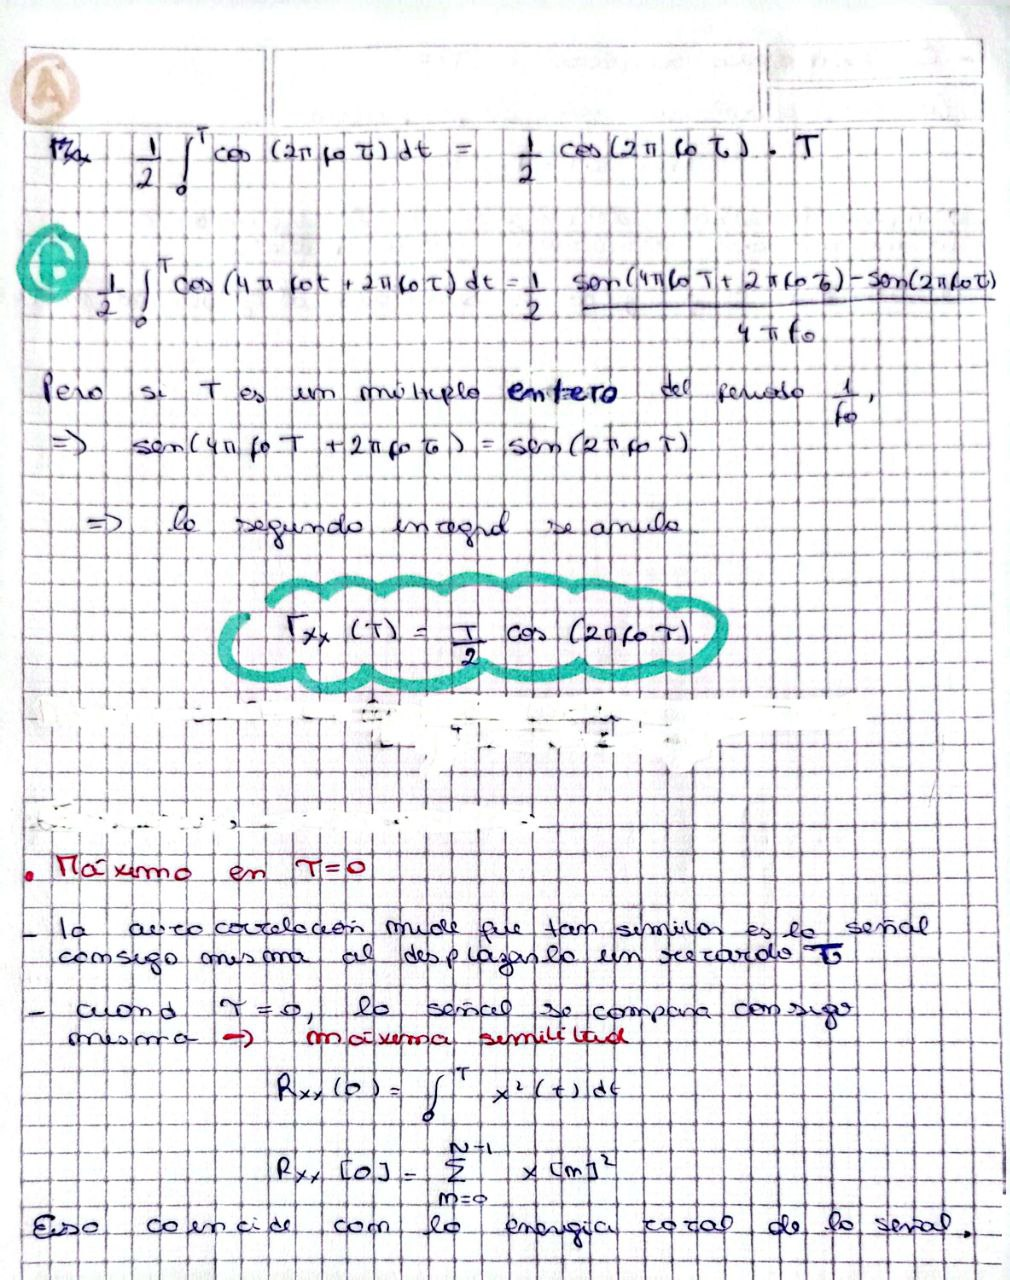

In [16]:
from IPython.display import Image, display
display(Image(filename='C:/Users/noefe/Downloads/imagen4_ts1.jpg'))

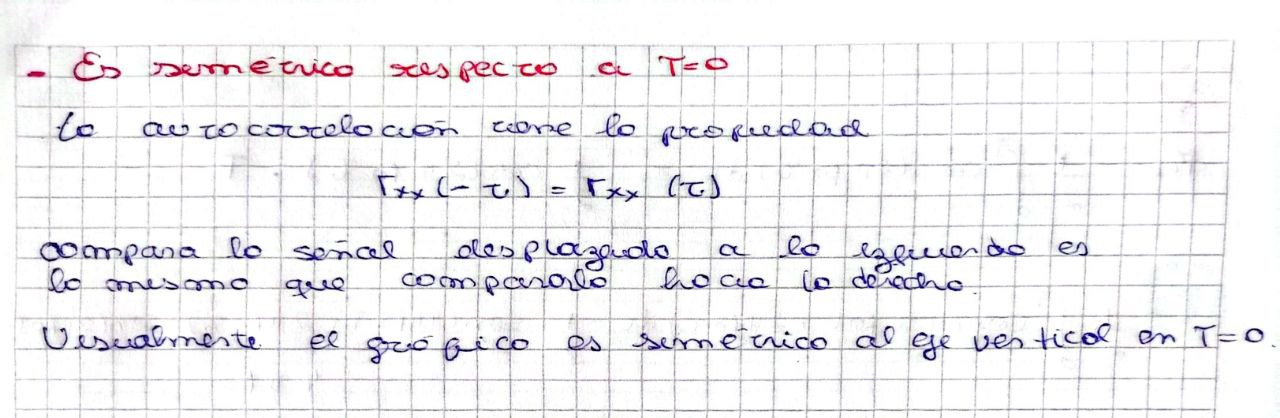

In [17]:
from IPython.display import Image, display
display(Image(filename='C:/Users/noefe/Downloads/imagen5_ts1.jpg'))

##### Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.

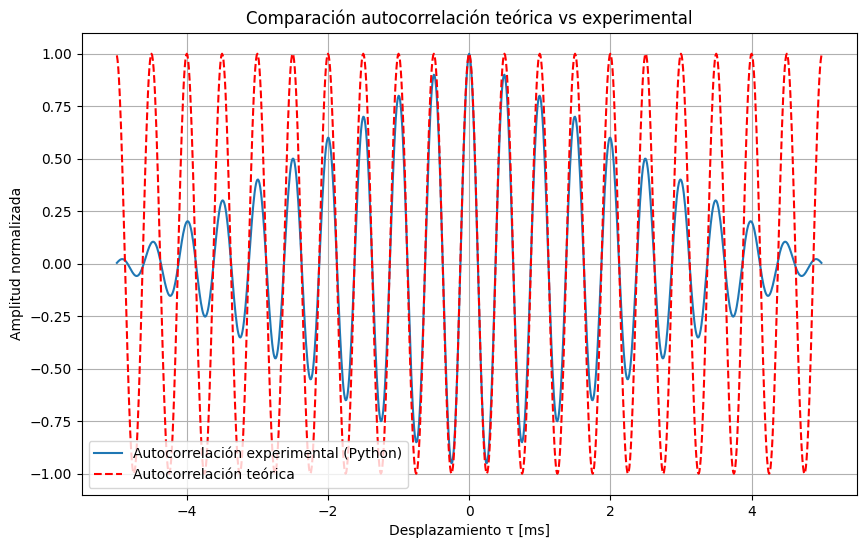

In [15]:

fs = 100000     # frec de muestreo
f0 = 2000       # frec de la señal
N = 500         # numero de muestras
T = N / fs      # duracion de la señal

Ts = 1/fs
t = np.arange(N) * Ts
x1 = np.cos(2*np.pi*f0*t)  # señal 

#Autocorrelacion experimental Python
R_xx = np.correlate(x1, x1, mode='full')
lags = np.arange(-len(x1)+1, len(x1)) * Ts  # en segundos
R_xx = R_xx / np.max(R_xx)   # normalizo para comparar

#Autocorrelacion teorica
tau = np.linspace(lags[0], lags[-1], len(lags))  # mismos ejes
R_teorica = (T/2) * np.cos(2*np.pi*f0*tau) 
R_teorica = R_teorica / np.max(R_teorica)  # normalizo también

plt.figure(figsize=(10,6))
plt.plot(lags*1000, R_xx, label="Autocorrelación experimental (Python)")
plt.plot(lags*1000, R_teorica, '--', label="Autocorrelación teórica", color="red")
plt.title("Comparación autocorrelación teórica vs experimental")
plt.xlabel("Desplazamiento τ [ms]")
plt.ylabel("Amplitud normalizada")
plt.legend()
plt.grid(True)
plt.show()



En la comparación entre la autocorrelación teórica y la experimental de la senoidal se ve que ambas coinciden en la forma general, ya que las dos siguen un patrón cosenoidal y son simétricas respecto a τ=0. La experimental aparece un poco atenuada en los extremos, lo cual tiene sentido porque trabajamos con una señal de duración finita y discretizada, mientras que la expresión teórica supone condiciones ideales. También se observa que la periodicidad de la autocorrelación coincide con la frecuencia original de la senoidal.

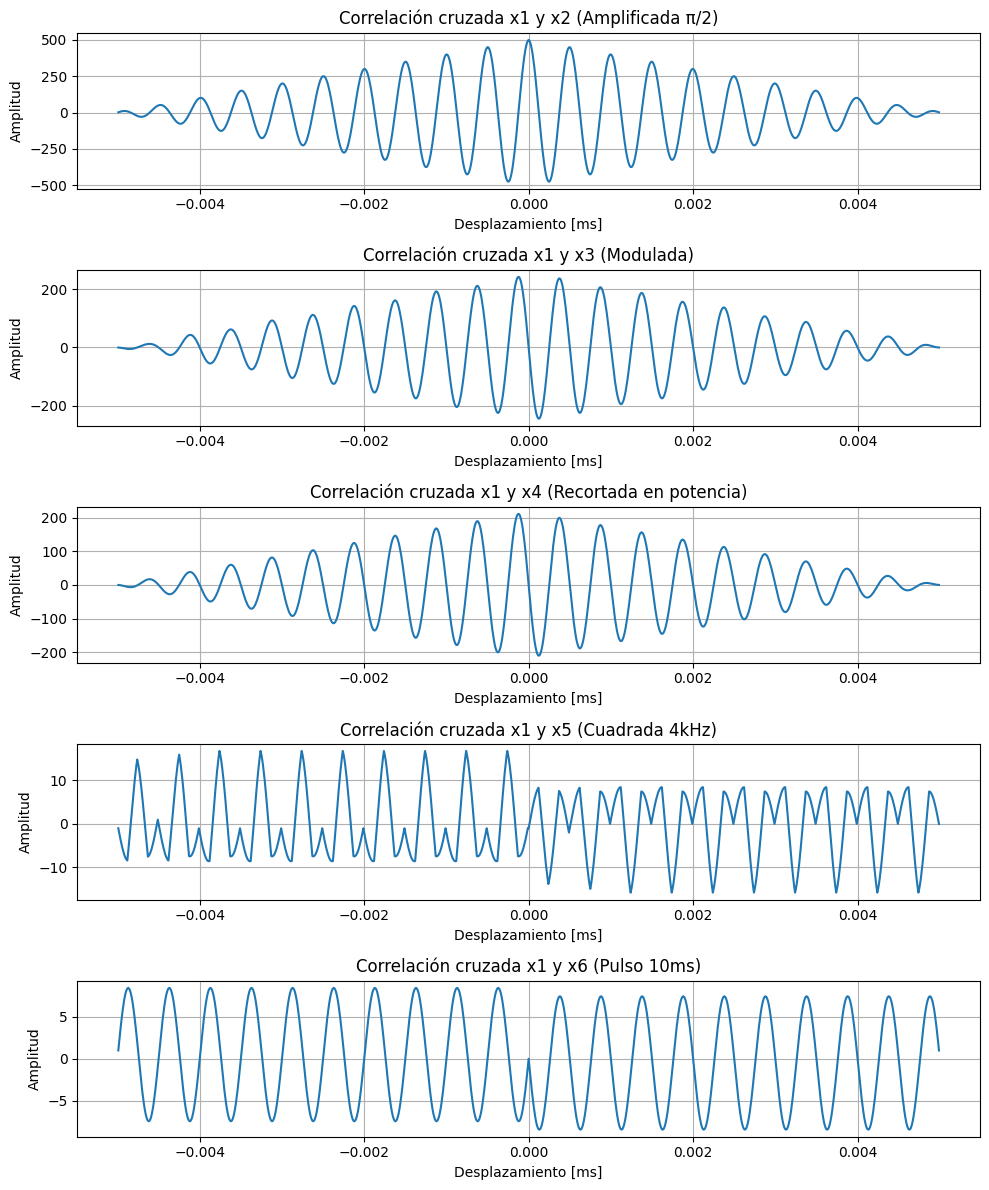

In [11]:
# ---- Correlación cruzada con las demás señales ----
plt.figure(figsize=(10,12))
for i, s in enumerate(senales):
    R_xy = np.correlate(x1, s, mode='full')
    plt.subplot(len(senales),1,i+1)
    plt.plot(lags, R_xy)
    plt.title(f"Correlación cruzada x1 y {nombres[i]}")
    plt.xlabel("Desplazamiento [ms]")
    plt.ylabel("Amplitud")
    plt.grid(True)
plt.tight_layout()
plt.show()

**Para el grafico de correlacion cruzada entre x1 y x2:** La correlación muestra oscilaciones similares a x1, pero con un desfase.

**Para el grafico de correlacion cruzada entre x1 y x3:** La correlación muestra cómo cambia la amplitud de la señal. Se nota la forma de la portadora, pero la modulación hace que la altura de la correlación varíe a lo largo del tiempo.

**Para el grafico de correlacion cruzada entre x1 y x4:** La correlación se parece mucho a la de x1, solo que la amplitud se ajustó para cumplir con el 75% de la potencia. Esto quiere decir que la correlación se basa en la forma de la señal, no en cuánto mide, ya sea grande o chica. Cambiar la amplitud solo hace que los valores de la correlación sean más altos o más bajos, pero la forma del gráfico sigue igual.

**Para el grafico de correlacion cruzada entre x1 y x5:**  La correlación tiene un patrón muy diferente, con picos fuertes y cambios bruscos, porque x5 es una señal cuadrada. Esto muestra que x1 y x5 no son ortogonales, ya que tienen algunas frecuencias en común. (aunque en el cálculo de ortogonalidad si me da que son ortogonales...)

**Para el grafico de correlacion cruzada entre x1 y x6:** La correlación muestra un patrón que se repite, pero solo durante la duración del pulso. 

 Las señales que comparten la misma frecuencia o estructura (como x1 y x4) presentan correlaciones altas. Señales con formas distintas o contenidos de frecuencia diferentes muestran correlaciones más bajas o patrones distintos. Este análisis permite visualizar qué señales interfieren entre sí y cuáles son aproximadamente ortogonales. Aunque debo de admitir que tengo sigo teniendo dudas de como se ven graficamente dos señales ortogonales, yo pensaba que debian de ser iguales pero ahora con este trabajo en verdad deben ser muy distintas, no?

#### **Ejercicio 4**

$$
2 \cdot \sin(\alpha) \cdot \sin(\beta) = \cos(\alpha - \beta) - \cos(\alpha + \beta)
$$


##### a) Demostrar la igualdad

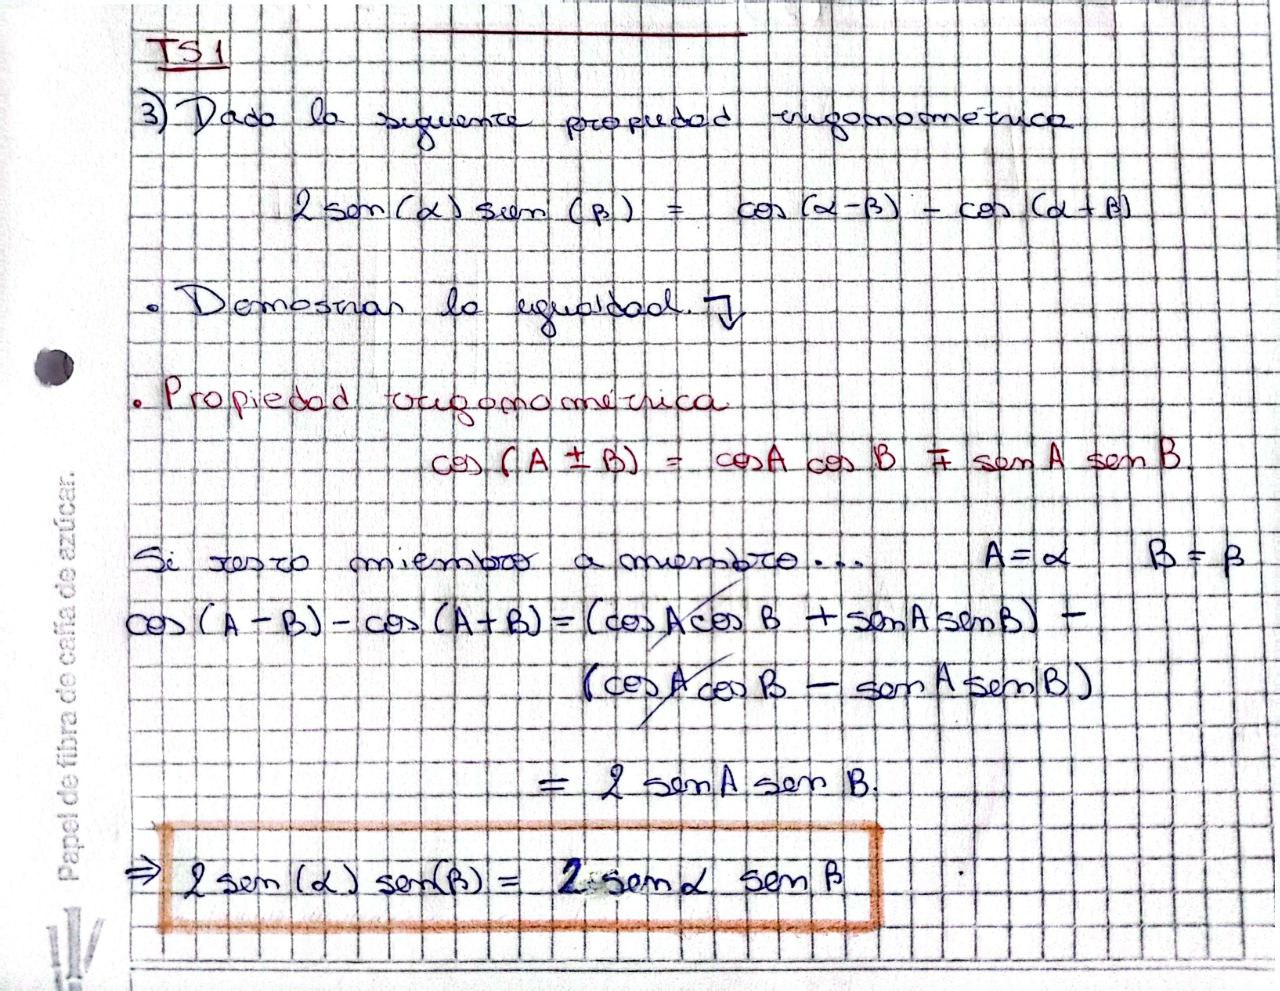

In [57]:
from IPython.display import Image, display
display(Image(filename='C:/Users/noefe/Downloads/imagen1_ts1.jpg'))



##### b) Mostrar que la igualdad se cumple con señales sinosoidales, considerando α=ω⋅t , el doble de β (Use la frecuencia que desee).

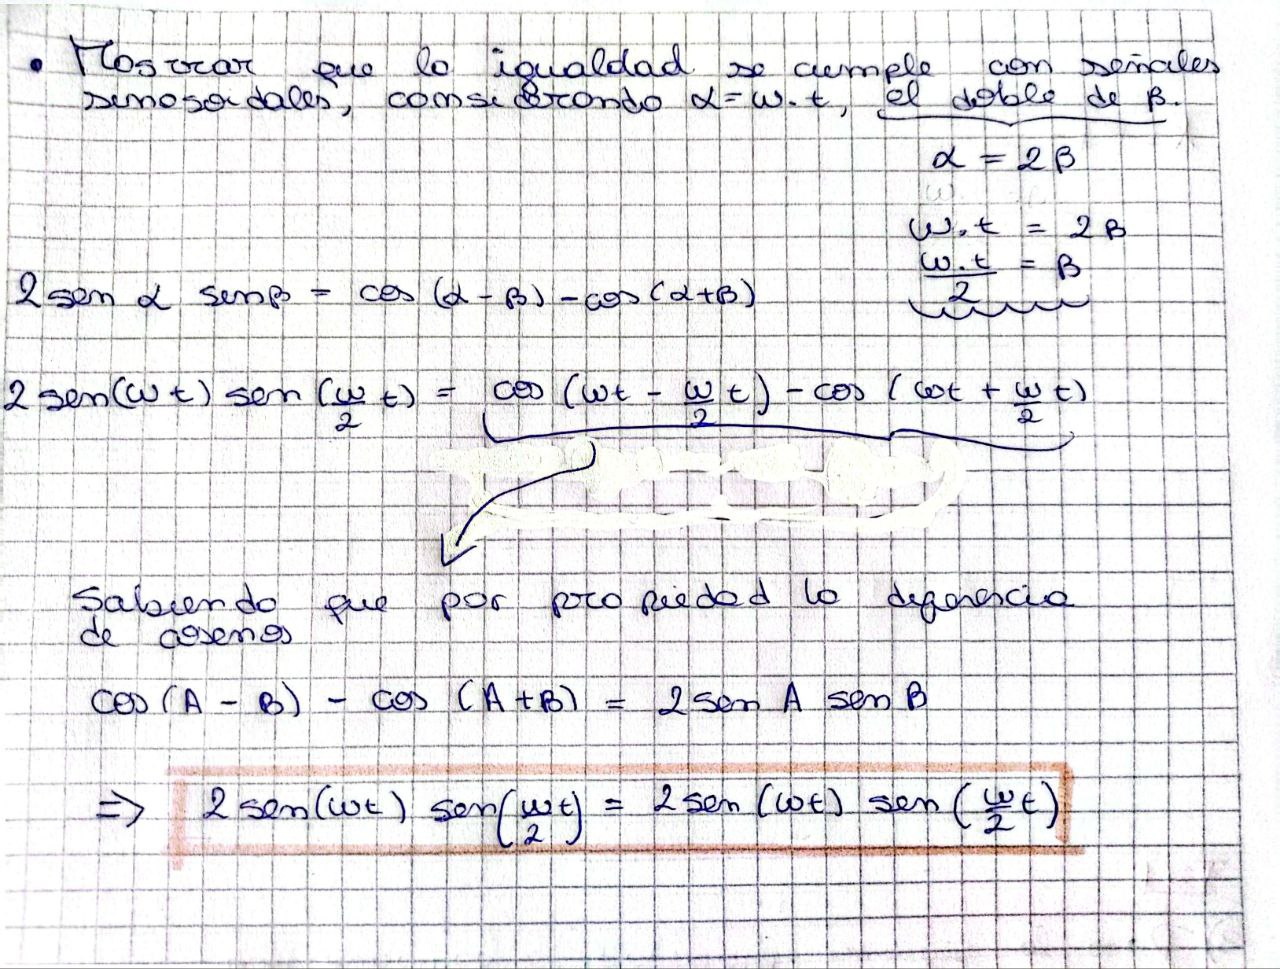

In [36]:
from IPython.display import Image, display
display(Image(filename='C:/Users/noefe/Downloads/imagen2_ts1.jpg'))

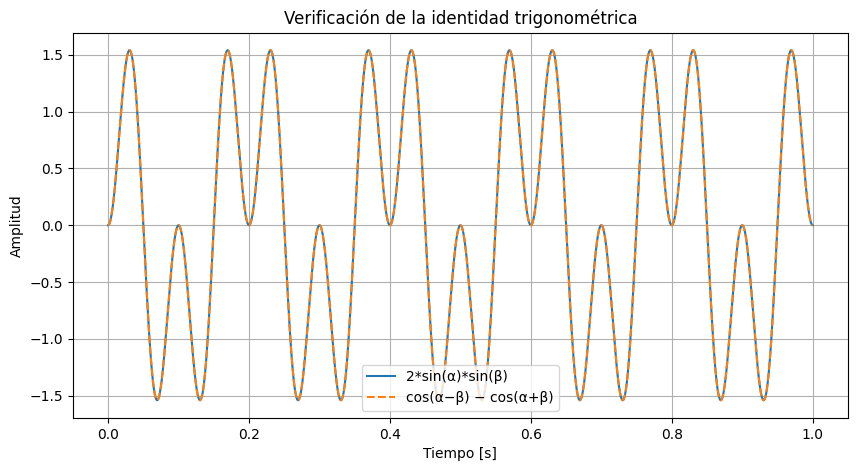

In [46]:
# Vector de tiempo
t = np.linspace(0, 1, 5000)  # 1 segundo, 5000 muestras

# Frecuencia angular
f = 5  # Elegi 5Hz
w = 2 * np.pi * f

alpha = w * t
beta = 2 * alpha  # doble de α

# Lado izquierdo
LI = 2 * np.sin(alpha) * np.sin(beta)

# Lado derecho
LD = np.cos(alpha - beta) - np.cos(alpha + beta)

plt.figure(figsize=(10,5))
plt.plot(t, LI, label='2*sin(α)*sin(β)')
plt.plot(t, LD, '--', label='cos(α−β) − cos(α+β)')
plt.title("Verificación de la identidad trigonométrica")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()



##### Las dos curvas coinciden exactamente, demostrando que la igualdad se cumple con señales sinusoidales.

## BONUS


##### Bajar un wav de freesoung.org, graficarlo y calcular la energía

(278784, 2)


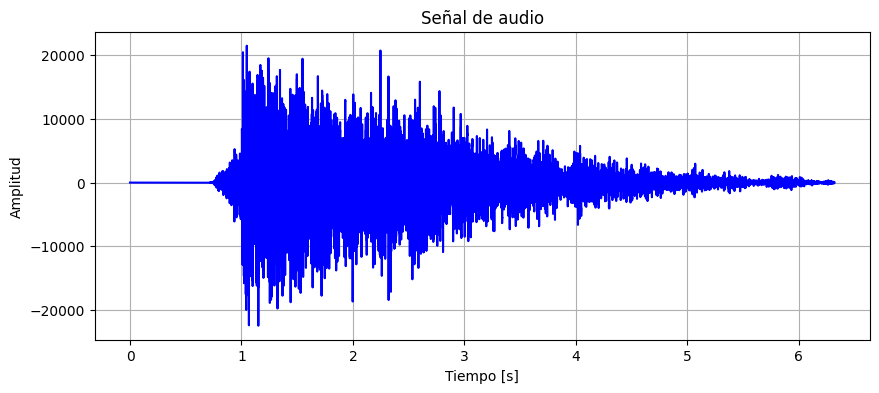

Energía total de la señal: 3070452534783.50
Energía promedio de la señal: 11013732.98


In [52]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# 1) Leo el archivo WAV 
fs, data = wavfile.read('C:/Users/noefe/Downloads/mi_audio.wav')  # fs = frecuencia de muestreo, data = muestras

print(data.shape)
#el resultado de este print es (278784, 2), significa que cada fila tiene dos valores,
# uno para cada canal. Para simplificar, muchas veces se hace un promedio de los dos canales y se convierte a mono.

#2) Convierto a mono ya que el sonido es estéreo,

if len(data.shape) > 1:
    data = data.mean(axis=1)

#3) Creo vector de tiempo
t = np.arange(len(data)) / fs

plt.figure(figsize=(10,4))
plt.plot(t, data, color='blue')
plt.title("Señal de audio: T")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()
 
#5) Calcular energía total y promedio 
energia_total = np.sum(data**2)
energia_promedio = np.mean(data**2)

print(f"Energía total de la señal: {energia_total:.2f}")
print(f"Energía promedio de la señal: {energia_promedio:.2f}")


Se pueden ver que los valores de energia son muy grandes, esto se debe a que cuando calculamos la energía de una señal de audio, estamos sumando los cuadrados de los valores de amplitud de cada muestra.
Es decir: $$
E = \sum_{n=0}^{N-1} |x[n]|^2
$$

Donde x[n] es el valor de la muestra en el tiempo n.

Al graficar la señal de audio, se nota cómo varía su amplitud con el tiempo. La señal empieza con un aumento rápido, llega a picos altos y luego va disminuyendo de manera gradual, mostrando los cambios en la intensidad del sonido en distintos momentos.

Calcular la energía total de la señal nos da una idea de cuánta “fuerza” tiene el sonido en general, mientras que la energía promedio indica el valor típico de energía a lo largo del tiempo. Las secciones con energía alta corresponden a partes más intensas del audio, y las de energía baja a momentos más suaves.



### CONCLUSIONES
___

En este trabajo vimos cómo se pueden generar y analizar diferentes tipos de señales, desde sinusoidales hasta pulsos rectangulares y señales cuadradas.
Aprendimos que al modificar la amplitud, la fase o la frecuencia afecta a la señal de distintas formas. También entendimos cómo calcular la energía y la potencia de una señal, y cómo la autocorrelación y la correlación cruzada ayudan a medir similitudes entre señales o consigo mismas. Por último, comprobamos la importancia de la ortogonalidad, ya que señales ortogonales no interfieren entre sí, algo fundamental en comunicación y procesamiento de señales. 
Tambén me gustaría comentar que con este trabajo pude entender que significa modular señales, algo que me pareció muy interesante.
Por ejemplo, si tengo una señal de audio, como la voz, que tiene una frecuencia baja de 1-4Hz, no se transmitirá bien a largas distancias por sí sola. Por lo tanto la modulo con una señal portadora de alta frecuencia (como una señal de radio, 100 kHz – 1 GHz) que si se transmite bien, logrando asi enviar la señal modulada y luego recuperar la señal original en el receptor. Esto muestra cómo la modulación permite transmitir información de manera práctica y efectiva.

## Template

Indicar una opción:

**Resolví la tarea con seguridad**

Responder:

¿Qué aprendiste al hacer esta tarea? ¿Qué te quedó claro? ¿Qué te sigue costando?

**Pude practicar mas como hacer señales en python, tambien logré comprender mejor conceptos teóricos que antes tenía flojos como por ejemplo la modulación.**


Indicar si se utilizó IA:

**Sí, usé chatGPT.**

En caso afirmativo, indicar una opción o varias:

**Código**

**Gráficos**